# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# 設定 data_path
dir_data = '../data/'

In [5]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 boxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [19]:
#1
"""
Your code here
"""
cut_rule = [ 0 , 1 , 3 , 5 , max(app_train['CNT_CHILDREN'].values)]
group_names = ['0', '1~2', '3~5', '>5']

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, labels=group_names,\
                                         right=False ,include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

0      215371
1~2     87868
3~5      4146
>5        124
Name: CNT_CHILDREN_GROUP, dtype: int64

In [45]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
print (grouped_df.mean())
grouped_df.describe()

CNT_CHILDREN_GROUP  TARGET
0                   0         166747.010980
                    1         160804.210548
1~2                 0         174590.584401
                    1         176115.362720
3~5                 0         175057.123091
                    1         159848.673123
>5                  0         165127.500000
                    1         192937.500000
Name: AMT_INCOME_TOTAL, dtype: float64


count           mean           std      min  \
CNT_CHILDREN_GROUP TARGET                                                   
0                  0       198762.0  166747.010980  1.061799e+05  25650.0   
                   1        16609.0  160804.210548  8.483011e+04  25650.0   
1~2                0        80081.0  174590.584401  1.201981e+05  26550.0   
                   1         7787.0  176115.362720  1.327159e+06  27900.0   
3~5                0         3733.0  175057.123091  1.133016e+05  29250.0   
                   1          413.0  159848.673123  1.090225e+05  36000.0   
>5                 0          108.0  165127.500000  8.533230e+04  45000.0   
                   1           16.0  192937.500000  1.800291e+05  36000.0   

                                25%       50%       75%          max  
CNT_CHILDREN_GROUP TARGET                                             
0                  0       112500.0  144000.0  202500.0   13500000.0  
                   1       112500.0  135000.0  202500.0    1890000.0  
1~2                0       112500.0  157500.0  211500.0   18000090.0  
                   1       112500.0  135000.0  202500.0  117000000.0  
3~5                0       112500.0  157500.0  202500.0    2250000.0  
                   1       102150.0  135000.0  184500.0    1350000.0  
>5                 0       112500.0  135000.0  219937.5     450000.0  
                   1       106875.0  148500.0  199125.0     810000.0

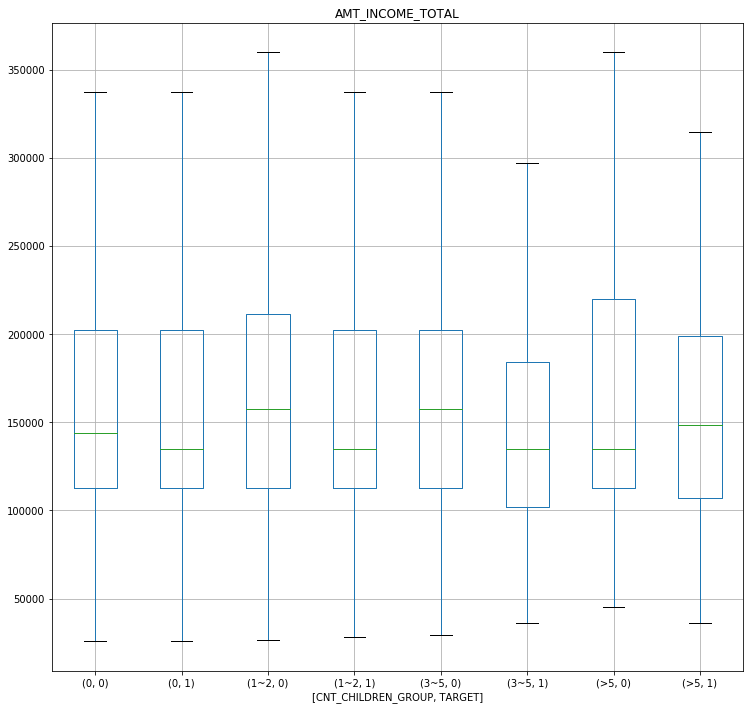

In [43]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [49]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(  lambda x: (x-x.mean())/x.std()  )

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135


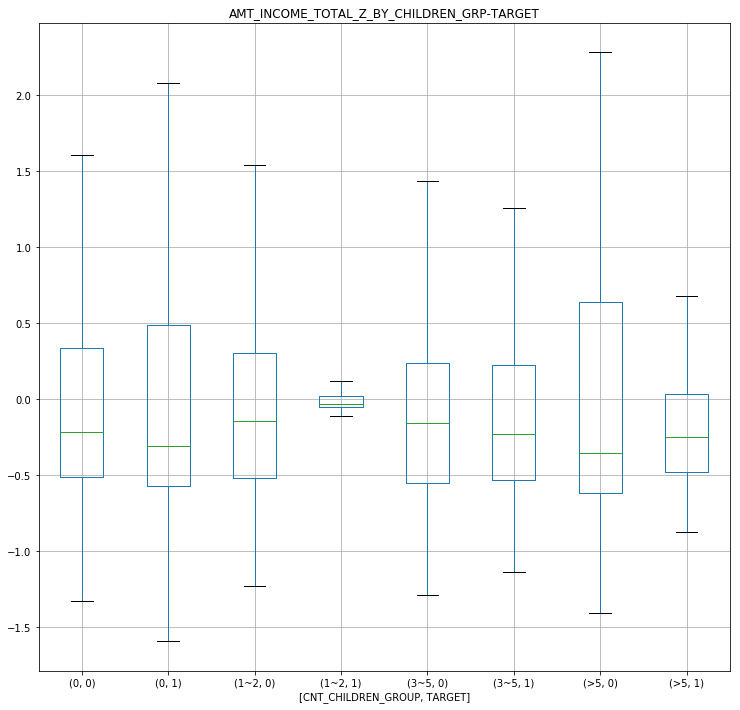

In [50]:
app_train.boxplot(column=['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'], by = plt_by,\
                  showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()